In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Filter out rows where 'flipper_length_mm' is missing
df = df.dropna(subset=['flipper_length_mm'])

# Calculate the statistics for each species
species_stats = df.groupby('species')['flipper_length_mm'].agg(
    mean_flipper='mean',
    median_flipper='median',
    min_flipper='min',
    max_flipper='max',
    q25_flipper=lambda x: x.quantile(0.25),
    q75_flipper=lambda x: x.quantile(0.75),
    std_flipper='std'
).reset_index()

# Create the histogram plot
fig = px.histogram(df, x='flipper_length_mm', color='species', nbins=30, title="Flipper Length Distribution by Species")

# Add vertical lines (vline) for mean and median, and horizontal lines (hline) to help visualize counts
for _, row in species_stats.iterrows():
    # For the mean (placing annotation at top left)
    fig.add_vline(x=row['mean_flipper'], line=dict(color='blue', width=2, dash='dash'), 
                  annotation_text=f"Mean: {row['mean_flipper']:.1f} mm", annotation_position="top right", 
                  annotation_font_size=12)
    
    # For the median (placing annotation at bottom left)
    fig.add_vline(x=row['median_flipper'], line=dict(color='green', width=2, dash='dash'),
                  annotation_text=f"Median: {row['median_flipper']:.1f} mm", annotation_position="bottom right",
                  annotation_font_size=12)

    # Add vertical rectangles (vrect) for the range and IQR
    # Full range (min to max)
    fig.add_vrect(x0=row['min_flipper'], x1=row['max_flipper'], fillcolor="LightSalmon", opacity=0.2, 
                  line_width=0, annotation_text=f"Range: {row['species']}", annotation_position="top right")
    
    # Interquartile range (25th to 75th percentile)
    fig.add_vrect(x0=row['q25_flipper'], x1=row['q75_flipper'], fillcolor="LightGreen", opacity=0.2, 
                  line_width=0, annotation_text=f"IQR: {row['species']}", annotation_position="bottom right")

    # Standard deviation range (mean +/- 2 std)
    fig.add_vrect(x0=row['mean_flipper'] - 2 * row['std_flipper'], x1=row['mean_flipper'] + 2 * row['std_flipper'], 
                  fillcolor="LightBlue", opacity=0.1, line_width=0)

# Add shaded intervals for the mean and median
for _, row in species_stats.iterrows():
    # Add a shaded vertical region for the mean
    fig.add_vrect(x0=row['mean_flipper'] - 5, x1=row['mean_flipper'] + 5, fillcolor="blue", opacity=0.1)
    
    # Add a shaded vertical region for the median
    fig.add_vrect(x0=row['median_flipper'] - 5, x1=row['median_flipper'] + 5, fillcolor="green", opacity=0.1)

# Show the plot
fig.show()


1.
above is histograms for flipper_length_mm for each penguin species in Plotly created by chatgpt
summary:
The code uses Plotly to create a histogram of the penguin dataset's flipper lengths, categorized by species. For each species, it overlays statistical markers:

Vertical Lines: Mean (blue, dashed) and median (green, dashed) of the flipper length.
Shaded Regions:
Full range (min to max) with a salmon-colored rectangle.
Interquartile range (IQR, 25th to 75th percentile) shaded in light green.
±2 standard deviations from the mean, shaded in light blue.
Annotations: Labels for the mean and median are added, along with the ranges to visually separate statistical insights. The adjustments made focus on improving visibility by separating annotations and reducing opacity for overlapping elements.


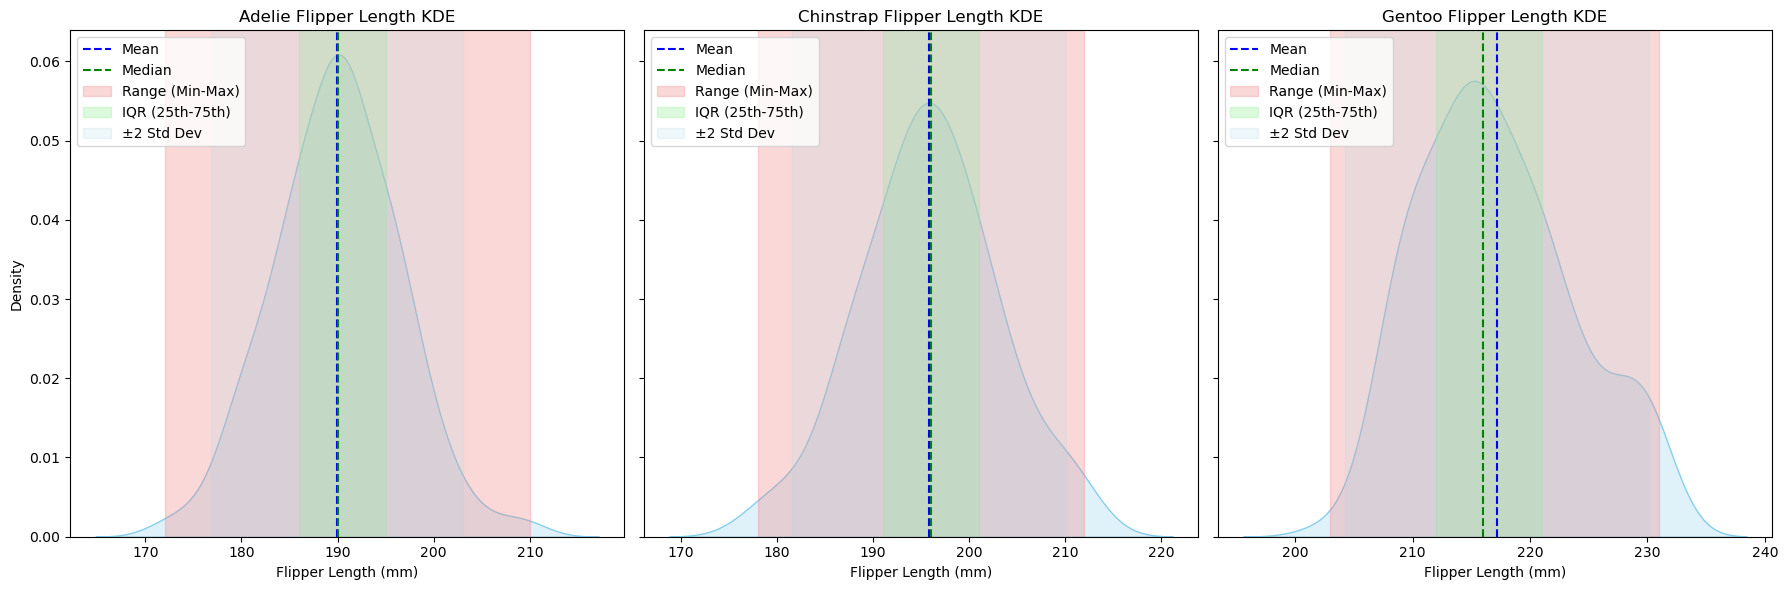

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Filter out rows where 'flipper_length_mm' is missing
df = df.dropna(subset=['flipper_length_mm'])

# Create a figure with three subplots, one for each species
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterate over species
for i, species in enumerate(df['species'].unique()):
    species_data = df[df['species'] == species]
    
    # KDE plot for flipper length
    sns.kdeplot(species_data['flipper_length_mm'], ax=axes[i], fill=True, color='skyblue')
    
    # Calculate statistics
    mean_flipper = species_data['flipper_length_mm'].mean()
    median_flipper = species_data['flipper_length_mm'].median()
    min_flipper = species_data['flipper_length_mm'].min()
    max_flipper = species_data['flipper_length_mm'].max()
    q25_flipper = species_data['flipper_length_mm'].quantile(0.25)
    q75_flipper = species_data['flipper_length_mm'].quantile(0.75)
    std_flipper = species_data['flipper_length_mm'].std()
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper, color='green', linestyle='--', label='Median')
    
    # Add shaded region for the range (min to max)
    axes[i].axvspan(min_flipper, max_flipper, color='lightcoral', alpha=0.3, label='Range (Min-Max)')
    
    # Add shaded region for IQR (25th to 75th percentile)
    axes[i].axvspan(q25_flipper, q75_flipper, color='lightgreen', alpha=0.3, label='IQR (25th-75th)')
    
    # Add shaded region for ±2 standard deviations from the mean
    axes[i].axvspan(mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper, color='lightblue', alpha=0.2, label='±2 Std Dev')
    
    # Set plot title and labels
    axes[i].set_title(f"{species} Flipper Length KDE")
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density' if i == 0 else '')
    
    # Add legend
    axes[i].legend(loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


2.
I asked the chatbot how to use Seaborn for KDE plots and to annotate these plots with statistical information. It provided a detailed explanation and code to add vertical lines for the mean and median and shaded areas for the IQR and range.

3.
I searched online for images of histograms, KDEs, and box plots, then described their differences to the chatbot. The chatbot provided a "pros and cons" list for each method, and I chose box plots as my preferred method due to their compact representation and ability to highlight outliers.
summary:
Yes, that captures the main differences between the three types of plots:

Histogram:

Purpose: Visualizes the count of data within specific intervals or bins.
Use Case: Useful when you want to see how frequently values fall within defined ranges.
Key Aspect: Displays the actual distribution by showing counts or frequencies.
KDE (Kernel Density Estimate):

Purpose: Provides a smooth, continuous estimate of the probability density function (PDF) of the data.
Use Case: Ideal when you want to understand the underlying data concentration without the rigid boundaries of a histogram.
Key Aspect: Smoother than histograms, allowing for better visualization of data patterns and trends.
Box Plot:

Purpose: Summarizes data by showing key statistics: median, quartiles, and potential outliers.
Use Case: Useful for comparing the spread, central tendency, and identifying outliers in the data.
Key Aspect: Focuses on data spread, especially in terms of the interquartile range (IQR), and does not display the full distribution like a histogram or KDE.
These methods provide different perspectives on the same data: counts (histogram), smooth density estimates (KDE), and a summary of spread with key statistics (box plot).
chat log link for 1,2,3: https://chatgpt.com/share/66f60bde-8e80-8005-8aea-f52732a457b1

4.
1)A and C have similar means and similar variances
2)B and C hav similar means but different variances
3)I can't find two datasets with similar variances but different means
4)A and D have different means and different variances
chat log link: https://chatgpt.com/share/66f61c27-ae48-8003-acbf-c800f92c621c

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate data
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Convert to pandas DataFrame for easier operations
df = pd.DataFrame({
    'A': data1,
    'B': data2,
    'C': data3,
    'D': data4
})

# Calculate mean and variance (with degrees of freedom = 1 for unbiased variance)
mean_A = df['A'].mean()
var_A = df['A'].var(ddof=1)

mean_B = df['B'].mean()
var_B = df['B'].var(ddof=1)

mean_C = df['C'].mean()
var_C = df['C'].var(ddof=1)

mean_D = df['D'].mean()
var_D = df['D'].var(ddof=1)

# Create subplots
fig = make_subplots(rows=1, cols=4)

# Add histograms for each dataset
fig.add_trace(go.Histogram(x=data1, name=f'A (mean={mean_A:.2f}, var={var_A:.2f})', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name=f'B (mean={mean_B:.2f}, var={var_B:.2f})', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name=f'C (mean={mean_C:.2f}, var={var_C:.2f})', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name=f'D (mean={mean_D:.2f}, var={var_D:.2f})', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

# Update layout and axis labels
fig.update_layout(height=300, width=750, title_text="Row of Histograms with Mean and Variance")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

# Standardize bin range for all histograms
for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# Show the figure
fig.show()  # Use fig.show(renderer="png") for GitHub/MarkUs submissions


5. chat log link: https://chatgpt.com/share/66f62052-a09c-8003-9874-8f18779a8cb9

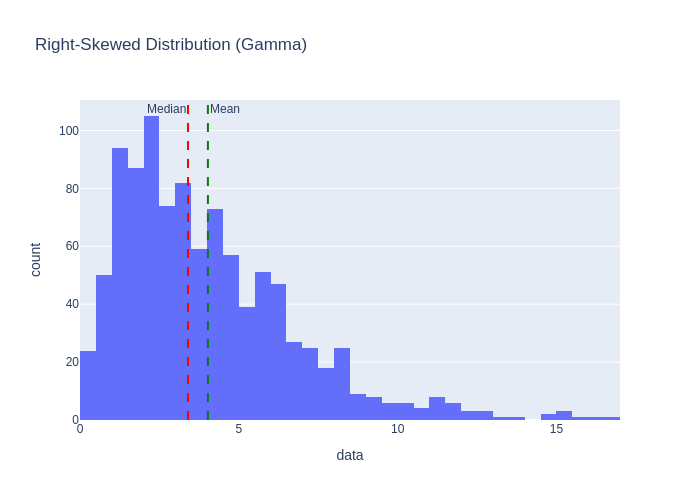

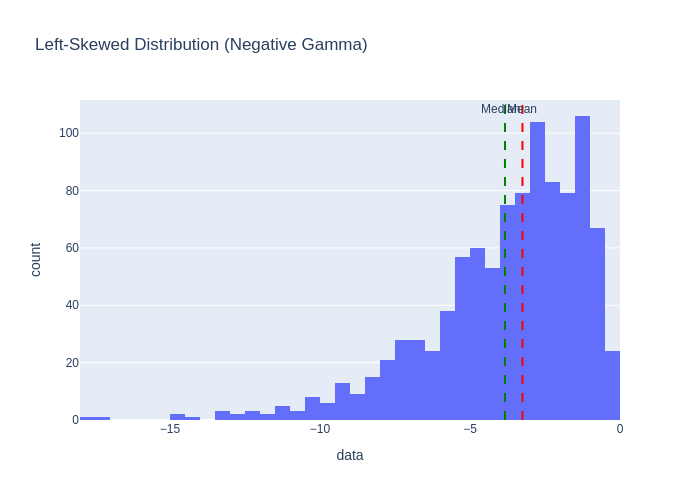

In [5]:
import plotly.express as px
import numpy as np
from scipy import stats
import pandas as pd

# Generate a right-skewed (positively skewed) distribution (Gamma)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

# Plot the histogram for the right-skewed distribution
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", nbins=50, title="Right-Skewed Distribution (Gamma)")

# Add lines for mean and median
fig1.add_vline(x=mean1, line_width=2, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top right")
fig1.add_vline(x=median1, line_width=2, line_dash="dash", line_color="red", annotation_text="Median", annotation_position="top left")

# Show the figure (use this format for GitHub and MarkUs submissions)
fig1.show(renderer="png")

# Generate a left-skewed (negatively skewed) distribution (Negative Gamma)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

# Plot the histogram for the left-skewed distribution
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", nbins=50, title="Left-Skewed Distribution (Negative Gamma)")

# Add lines for mean and median
fig2.add_vline(x=mean2, line_width=2, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top right")
fig2.add_vline(x=median2, line_width=2, line_dash="dash", line_color="red", annotation_text="Median", annotation_position="top left")

# Show the figure (use this format for GitHub and MarkUs submissions)
fig2.show(renderer="png")


6.
summary:Data Preparation:

A sample dataset is created using a DataFrame that contains weights represented as strings in mixed units (both pounds and kilograms).
Each entry is formatted as "weight in lb // weight in kg".
Conversion Function:

The convert_to_pounds function is defined to extract numeric values from the weight strings.
It checks for the presence of "lb" or "kg" in the string.
If "lb" is found, it extracts and returns the numeric value directly.
If "kg" is found, it extracts the numeric value before "kg", converts it to pounds using the conversion factor (1 kg = 2.20462 lb), and returns the result.
Data Processing:

The conversion function is applied to the 'Weight' column of the DataFrame, creating a new column 'Weight_lb' that contains the weights in pounds.
Rows with missing or invalid weight values are dropped.
Summary Statistics Calculation:

The mean, median, and variance of the weights in pounds are calculated using the mean(), median(), and var() methods.
The calculated statistics are printed to the console.
Data Visualization:

A kernel density estimation (KDE) plot is created using Seaborn to visualize the distribution of the weights in pounds.
Vertical lines are added to indicate the mean (red dashed line) and median (green solid line) on the plot.
The plot is titled, and axes are labeled for clarity.
Key Features:
Data Cleaning: The code effectively handles mixed unit representations and drops invalid entries.
Statistical Analysis: It provides clear summary statistics for the weights, which helps in understanding the central tendency and dispersion.
Visualization: The KDE plot offers a smooth representation of the weight distribution, enhanced by the inclusion of statistical markers (mean and median) for better interpretation.
Usage:
This code can be useful in scenarios where weights are reported in mixed formats, allowing for straightforward analysis and visualization in a consistent unit (pounds).
chat log link: https://chatgpt.com/share/66f62641-84e0-8003-91e5-d6e126582f1a

Mean: 374.0 lb
Median: 200.0 lb
Variance: 123967.5 lb^2


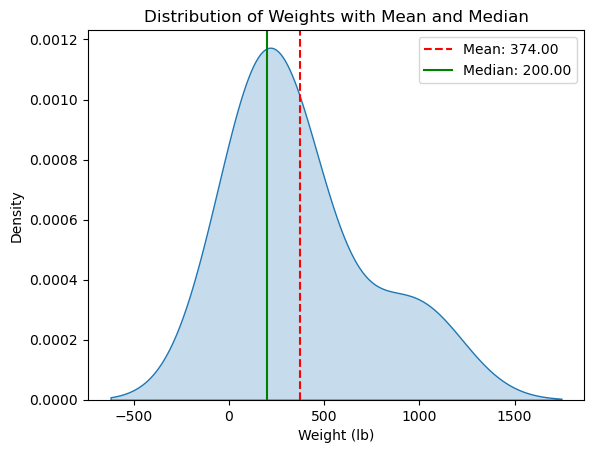

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with weight in mixed units (lb and kg)
data = pd.DataFrame({
    'Weight': ['200 lb // 90 kg', '980 lb // 441 kg', '145 lb // 65 kg', '160 lb // 72 kg', '385 lb // 173 kg']
})

# Function to extract numeric values and convert to pounds
def convert_to_pounds(weight_str):
    if 'lb' in weight_str:
        lb_part = weight_str.split('lb')[0].strip()  # Extract the part before 'lb'
        return float(lb_part)
    if 'kg' in weight_str:
        kg_part = weight_str.split('kg')[0].split('//')[-1].strip()  # Extract the part before 'kg'
        return float(kg_part) * 2.20462  # Convert kg to pounds
    return np.nan

# Apply the conversion to the 'Weight' column
data['Weight_lb'] = data['Weight'].apply(convert_to_pounds)

# Drop any rows with missing or invalid weights
data = data.dropna(subset=['Weight_lb'])

# Calculate summary statistics
mean_val = data['Weight_lb'].mean()
median_val = data['Weight_lb'].median()
variance_val = data['Weight_lb'].var()

# Print the calculated statistics
print(f"Mean: {mean_val} lb")
print(f"Median: {median_val} lb")
print(f"Variance: {variance_val} lb^2")

# Plot the distribution of weights
sns.kdeplot(data['Weight_lb'], fill=True)
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
plt.legend()
plt.title('Distribution of Weights with Mean and Median')
plt.xlabel('Weight (lb)')
plt.show()


7.

In [13]:
import plotly.express as px
import pandas as pd

# Load the Gapminder dataset, or your own dataset if you have one
# For this example, let's use the built-in Gapminder dataset in Plotly Express
df = px.data.gapminder()

# Create an animated scatter plot
fig = px.scatter(
    df,
    x="lifeExp",                # X-axis: Life Expectancy
    y="gdpPercap",              # Y-axis: GDP per Capita (You can replace this with your own indicator)
    animation_frame="year",     # Animation by year
    animation_group="country",  # Keep track of countries during animation
    size="pop",                 # Population as the marker size
    color="continent",          # Group countries by continent for color coding
    hover_name="country",       # Display country names on hover
    log_y=True,                 # Set Y-axis to log scale for better visualization
    size_max=60,                # Maximum marker size
    range_x=[20, 90],           # X-axis range (Life Expectancy)
    range_y=[100, 100000],      # Y-axis range (GDP per Capita)
    title="Life Expectancy vs GDP per Capita (Animated by Year)"
)

# Customize animation settings
fig.update_layout(
    xaxis_title="Life Expectancy (Years)",
    yaxis_title="GDP per Capita (Log Scale)",
    title_font_size=24,
    showlegend=True
)

# Show the plot
fig.show()


8.
chat log link for 7,8: https://chatgpt.com/share/66f62847-221c-8005-a574-34567ac3c0e3

In [14]:
import plotly.express as px
import pandas as pd

# Sample dataset: You will need to modify the dataset or use your own
# We'll simulate an example here using the built-in Gapminder dataset for simplicity

# Load Gapminder dataset (or replace with your dataset)
df = px.data.gapminder()

# 1. Create new columns: Percent change and rank over time
# Assuming we're calculating percent change in GDP per capita over time

df['gdpPercap_pct_change'] = df.groupby('country')['gdpPercap'].pct_change() * 100  # Calculate percent change
df['rank'] = df.groupby('year')['gdpPercap'].rank(ascending=False)  # Rank countries by GDP per capita

# 2. Create a 'percent' column for the size of the bubbles (can be based on population or another metric)
df['percent'] = df['pop'] / df['pop'].sum() * 100  # Calculate percent for population

# 3. Add a 'sex' column (for simplicity, we'll simulate a "sex" column; in real-world data, you'll need real values)
import numpy as np
df['sex'] = np.where(np.random.rand(len(df)) > 0.5, 'Male', 'Female')  # Randomly assign 'Male' or 'Female'

# 4. Create the scatter plot
fig = px.scatter(
    df,
    x="gdpPercap_pct_change",   # X-axis: Percent Change (calculated above)
    y="rank",                   # Y-axis: Rank (calculated above)
    size="percent",             # Marker size based on 'percent'
    color="sex",                # Color by 'sex' (Male, Female)
    hover_name="country",       # Hover to show country names
    animation_frame="year",     # Animation over time (year)
    animation_group="country",  # Ensure continuity across countries over time
    size_max=60,                # Max size of bubbles
    range_x=[-100, 100],        # Adjust X-axis range for percent change (optional)
    range_y=[0, len(df['country'].unique())],  # Y-axis range for rank
    title="Percent Change vs Rank over Time"
)

# 5. Customize layout (optional)
fig.update_layout(
    xaxis_title="Percent Change in GDP per Capita",
    yaxis_title="Rank (GDP per Capita)",
    title_font_size=20,
    showlegend=True
)

# Display the plot
fig.show()


In [16]:
import pandas as pd
import plotly.express as px

# Sample dataset for baby names popularity over years
data = {
    'year': [2000, 2000, 2001, 2001, 2000, 2000],
    'name': ['Emma', 'Olivia', 'Emma', 'Olivia', 'Liam', 'Noah'],
    'popularity': [15000, 13000, 14000, 12500, 16000, 15500],
    'sex': ['F', 'F', 'F', 'F', 'M', 'M'],
    'rank': [1, 2, 1, 2, 1, 2]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate percentage change in popularity over time for each name
df['popularity_pct_change'] = df.groupby('name')['popularity'].pct_change() * 100

# Fill NA values with 0% for the first year (no previous data)
df['popularity_pct_change'].fillna(0, inplace=True)

# Calculate total population and percent of popularity (for bubble size)
total_popularity_per_year = df.groupby('year')['popularity'].sum()
df['percent'] = df['popularity'] / df['year'].map(total_popularity_per_year) * 100


In [17]:
# Create the animated scatter plot
fig = px.scatter(
    df,
    x='popularity_pct_change',  # X-axis: Percent change in popularity
    y='rank',                   # Y-axis: Rank (lower is better)
    size='percent',             # Bubble size: Percent of popularity
    color='sex',                # Color based on sex (or any other categorical variable)
    hover_name='name',          # Display name on hover
    animation_frame='year',     # Animate over time by year
    animation_group='name',     # Ensure continuity of each name across years
    size_max=50,                # Maximum bubble size
    range_x=[-100, 100],        # Adjust X-axis range for percent change
    range_y=[len(df['rank'].unique()), 1],  # Reverse Y-axis (so smaller ranks are at the top)
    title="Rank Order of Baby Names with Percent Change in Popularity Over Time"
)

# Customize layout
fig.update_layout(
    xaxis_title="Percent Change in Popularity (%)",
    yaxis_title="Rank (Lower is Better)",
    title_font_size=20,
    showlegend=True
)

# Show the plot
fig.show()
